# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'
signnames_file = 'signnames.csv'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

reader = csv.reader(open(signnames_file, 'r'))
y_labels = {}
for row in reader:
   k, v = row
   y_labels[int(k)] = v

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(list(set(y_train)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random

# used to display images in the same line
# from here https://stackoverflow.com/questions/38318166/jupyter-notebook-output-image-in-previous-line
def align_figures():
    import matplotlib
    from matplotlib._pylab_helpers import Gcf
    from IPython.display import display_html
    import base64
    from ipykernel.pylab.backend_inline import show

    images = []
    for figure_manager in Gcf.get_all_fig_managers():
        fig = figure_manager.canvas.figure
        png = get_ipython().display_formatter.format(fig)[0]['image/png']
        src = base64.encodebytes(png).decode()
        images.append('<img style="margin:0" align="left" src="data:image/png;base64,{}"/>'.format(src))

    html = "<div>{}</div>".format("".join(images))
    show._draw_called = False
    matplotlib.pyplot.close('all')
    display_html(html, raw=True)

# Visualizations will be shown in the notebook.
%matplotlib inline
def show_img(img_data):
    fig, ax = plt.subplots()
    ax.axis('off')
    ax.imshow(img_data)

#load 5 random images
for i in range(0,6):
    idx = random.randint(0, n_train)
    show_img(X_train[idx])
    print(y_labels[y_train[idx]])
align_figures()

Speed limit (70km/h)
Speed limit (60km/h)
Yield
Speed limit (30km/h)
Speed limit (50km/h)
Speed limit (30km/h)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAP8AAAD8CAYAAAC4nHJkAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFLRJREFUeJztndtvHPd1x89c98Jd3imKlEhdaN1qpZBruXbcuGiCtEkb
tChQtA/tQ/+uvvahKVAUKBAUSQu3yKWNYcdpZMGyLUqWSYkUKZJ75XJ3Z2dnpq99+H1P13KxAXq+
n8ffF7/d2Zn5coD58pzjFUUhhBB7+L/uAyCE/Hqg+QkxCs1PiFFofkKMQvMTYhSanxCj0PyEGIXm
J8QoND8hRgmn+WV/9Wdvw38n7HfacF+9XHGuV8C6iIgn+D8XPcmhlqV43whog8EQf1cUQS3J8HFE
nge1UoAvWx66v6+fjuCeagkfoz/OoBbkWCsF7uOPQ/y8qVZiqD07OYTaaYqPv1JZcK4H4PhERJYV
bSmAkvR8fD0HcRVqlajsXO+cNOGe3ZMW1P71Fw/wD/gf8MlPiFFofkKMQvMTYhSanxCj0PyEGIXm
J8QoU436Ou0+1MoBjkJKsTsKCZVIJo7wTxsk+DiSQokBQUTox/i7MqVXipbHJGmqbMR5U5q4Iz1P
+TN/Nhjg40jGUKuB6yIiMhq795UFH3s+xr+5Ol+HWreN9/UStxYq90e/h89HulCDmigxpoT4ajd6
Hef6KMPxbLn81a3LJz8hRqH5CTEKzU+IUWh+QoxC8xNiFJqfEKNMNeoLfRx3aFo6AnFTjg+/1+1B
7SxNoDZWoqgoKoF1vKcU4L+veR9HjsMMR2xZgn+bBzI938fHmCkVhEWsxIpKFVuRuz9zMMCxXBbh
Ks3K3BLUwoE7KhMRaTbdWn6mVG8qlYzNMd5Xq7rvDxGRMMDXswJix8LD1YohLoCcGD75CTEKzU+I
UWh+QoxC8xNiFJqfEKNM9W1/pPTVGyk95pLU/eZ4NMZvm1NQWCIiSgc/XRNUNBPg31WJ8Jt0L8Nv
lbW+enNl/Ko3F/CZypvjXop/dVfpT5iF+HcHofvN99kI/+ZWA6cf4xNcbFMoxVizJfe5ikb42JvK
vdhs4KSl2TiDmq8kI0sLM871QunxKEoaNCl88hNiFJqfEKPQ/IQYheYnxCg0PyFGofkJMcp0oz4f
f91whAs+BqC321CJ+sY5jnK0aKgocBQ1FvdxeErxi3i42KMGxjSJiMTan2UlmivAz9biyMjHMWCm
FLL0U/zbEt99HltDHKMNCiW+KvAJqVXxeayWgDY4hXsidBJFpFDuq1QpCPKUfpONtjvG9F8+lJ4I
PvkJMQrNT4hRaH5CjELzE2IUmp8Qo9D8hBhlqlHfWPlbo0yFkqxwR2lhqERsSuwyVCZhpTneJ6DX
nadUiGVKs7VMiX9edLtQKwVKb7fQfUljZVxUa4Qr5s48PCYrDBahlo2azvU0x/eAB/r+iYj4SvyW
nOJquuc9dxVeRYmdT5WKUC1CzpX7u1Duxzhy3yO5MtCtUIe9TQaf/IQYheYnxCg0PyFGofkJMQrN
T4hRaH5CjDLVqO9UGdWUahEKiNh8ZcyUMv1LCqV6rCi0jW4tUKrilGJF6SRKxKacK09JOGdAhWE5
xFFTocSRK+c2oLa0sAW1buOxc/34CDfpzJSmlFqFWzrE2ghUJQ4LfH7V1pgBPvlaRWgYYKvlIMbU
wrwCjGX7MvDJT4hRaH5CjELzE2IUmp8Qo9D8hBiF5ifEKFON+oYpjkK0qA9V2gVKnhf6OJKJldjF
V6r6UC/LVMnzkgRroRIRhuEs1GbKuGHl5tKSc32lgpttlpW5gDPV81DzBH+mf37Nud6eweejc4Yr
GUcevj92DxpQ6yXuGDBRYsUix1roK5V7Wh/XAO8b5+5j1KJsFA9+GfjkJ8QoND8hRqH5CTEKzU+I
UWh+Qowy1bf9I7U3Gi7OyEARg/JSVnKlPMNT3pSWlJRgnLrfVI+VopNqjE/xQt39RlxEpF65ALUL
56pQu1hzr3udDtwz6uHRVX77CdSyYh9q4iXO5VqIr8tMNAO1UakCtXB9Hmp7x+7f3R3iZGEwwudj
kOO0wlfSp1y5v5E21t7oK6nDpPDJT4hRaH5CjELzE2IUmp8Qo9D8hBiF5ifEKFON+rTxWp7SOy8o
3H+jMlRpIyLjsRLJKN3RggifEtQPLqrjsVV3Ll6G2o0a7o9XDpah5mXHUGs8/ti5np8N4Z5MGZOl
9ZELQ1wQhApnCiW+ypXINItxn8FL5y9CbWHJva/Rw/fi8z5+Jj49xZFplo+gpv5uGAPiPR7HdRFC
XhaanxCj0PyEGIXmJ8QoND8hRqH5CTHKlKM+HA0VSjSXZ+4oxFN6nAWBEl8pY5Uy5TjqM+7jv3zz
G3DPW5fegdpaD1fMNU8+hdqzp59DzR+5I7211VfgnvmV61BbXjsHtXIFVxf2++6xXN1WE+5pn+xA
7en+Z1AbHODzUau5j7FcqsM9RbgAtZ4cQK3RxlWORYFjTDQBrBxie2b/B49tPvkJMQrNT4hRaH5C
jELzE2IUmp8Qo9D8hBhlqlFfqlQiZUqvwgxEfb4yditWRlrVYvw3z1NGil284G6q+eat1+Ce8x5u
0tk7/BXUtnf/C2oS44aVd97+fef61s234Z4LN/Hxn9tYhVqGT5XkQGw3cdTX2HsEtfUHP4fahz97
F2rdE3c0N1/Do8aWY1ylmc1hLR/isWEngzOorZbdceSKMkat7+PocFL45CfEKDQ/IUah+QkxCs1P
iFFofkKMQvMTYpSpRn1nfdzg0FOaFRYgB/SUho9BhBs0hhFuBlku4RjttZvfdq7/7u0rcM/2B/8B
td1HWCuUCsjf+d6fQ+037v6hc31l8zzcE63iWDTBp1F9cviee+PixRW4p3ppFmrr1y5Dbe3CJtR+
9I/fd663nx/CPdEcvhe3FpWKvwHW2gm+9yuRO3ZcVOLIsoerTyeFT35CjELzE2IUmp8Qo9D8hBiF
5ifEKDQ/IUaZblXfyD2/TUSfZeYBLc9w3JEpEZXgsXWysY4jsTfe/q5zPfZP4J5P7/0IalmvBbWv
f+9PoXbtjbegtn3ibiK5nR7h49jB0WdYxSeyXsa3z9amuwJyOE7gnlYPx2HSw9f63A1clfiNP3Y/
3979p7+Dew6V6sJXF3Hjz6vrePbikw6e8YdiwDm/AvdEytzLSeGTnxCj0PyEGIXmJ8QoND8hRqH5
CTHKVN/2a2/0c6UlWQh69WUZTg+CAvcLHCvftbSKx1OtnncXpXzwgx/CPXt7x1C7vfYq1O68+RdQ
81fxm969h//gXt/Gb47D8jWo7ew9hNrtLZyMLERvOtcfP8ejte4/xulHeIoLnS7W8TW7e8M9Lu32
13FCs/d9PBqsd4BTk3PXvga12RlctNRuu++R/e4p3LM6h6/npPDJT4hRaH5CjELzE2IUmp8Qo9D8
hBiF5ifEKFON+jxlJJevjPIKQT875eMk8vDftZkYF7Is1XGE0jnec64fH7hHQomIDFL8u+Y3t6C2
+pu3oNarvIDa9cvLzvWNJRzL1RffgNrffPg+1Jav4t6FB/c+da4/enwf7qnUcWHM/NI61O4/dF8X
EZGL6+44df3qDbhnYW4JaqMOjt9qyg15bhb3hmy33PFhp4+LoLxCmZU2IXzyE2IUmp8Qo9D8hBiF
5ifEKDQ/IUah+QkxylSjvjxX+vT5OBIrcnf1XkkZyVWK8E/zPPxdQYSPsdl86lzvNnH0Ni7w39eN
6xehFuFkTiopjo02L33TuT5bXoV7vniM++NFyr61DXflnojI/vY95/rRMR5B9Zd/8kdQ80Mcv338
4G+h1uq7Y7RXty7BPXOL+DfnjSdQkxFuDrmqjPn6fNd9Hw/G+Lr0BriidVL45CfEKDQ/IUah+Qkx
Cs1PiFFofkK

### Distribution of classes

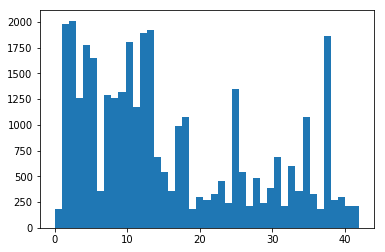

0 180
1 1980
2 2010
3 1260
4 1770
5 1650
6 360
7 1290
8 1260
9 1320
10 1800
11 1170
12 1890
13 1920
14 690
15 540
16 360
17 990
18 1080
19 180
20 300
21 270
22 330
23 450
24 240
25 1350
26 540
27 210
28 480
29 240
30 390
31 690
32 210
33 599
34 360
35 1080
36 330
37 180
38 1860
39 270
40 300
41 210
42 210


In [4]:
#Display markdown content
from IPython.display import Markdown, display
from collections import Counter

def print_md(string):
    display(Markdown(string))

#Check the distribution of classes
print_md("### Distribution of classes")
n, bins, patches = plt.hist(y_train, bins=max(y_train+1))
plt.show()

signs_per_class = Counter(y_train)

for key in sorted(signs_per_class):
    print (key, signs_per_class[key])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import numpy as np
import cv2
from scipy import misc
from tqdm import *

In [6]:
# Save extra data. Removed for now as the manual pick of classes performs a little faster

# filehandler = open('X_train_extra.p', 'wb')
# xtradata    = []
# xtradata = {'X_train' : X_train, 'y_train' : y_train}

# pickle.dump(xtradata, filehandler)

In [7]:
# Grayscale
import numpy as np

def to_gray(X):
    X_gray = np.sum(X/3, axis=3, keepdims=True)
    return X_gray

X_train_gray = to_gray(X_train)
X_valid_gray = to_gray(X_valid)
X_test_gray  = to_gray(X_test)

In [8]:
# Normalize grayscale

X_train_norm = (X_train_gray - 128)/128 
X_valid_norm = (X_valid_gray - 128)/128
X_test_norm  = (X_test_gray - 128)/128

%matplotlib inline

In [9]:
bar     = tqdm(range(len(y_train)))
n_extra = 0
Xtra_train = np.ndarray((0, 32,32))
ytra_train = np.ndarray((0))

# -= Declare transformations =-

def append_image(X,y,new_image,cls):
    #Insert new images
    X = np.append(X,[new_image], axis=0)
    # and the respective labels
    y = np.append(y,cls)
    return X,y

def cv2_rotate(image, angle):
    row,col = image.shape
    center  = tuple(np.array([row,col])/2)
    rot_mat = cv2.getRotationMatrix2D(center,angle,1.0)
    image   = cv2.warpAffine(image, rot_mat, (col,row))
    return image

def cv2_rotate_rand(new_image):
    angle = random.randint(-5,5)
    rotated_img_right  = cv2_rotate(new_image,  angle)
    return rotated_img_right

def cv2_rotate_left(new_image):
    angle = random.randint(-10,0)
    rotated_img_left  = cv2_rotate(new_image,  angle)
    return rotated_img_left

def cv2_rotate_right(new_image):
    angle = random.randint(0,10)
    rotated_img_right  = cv2_rotate(new_image,  angle)
    return rotated_img_right

def cv2_scale(new_image):
    scale_by = random.randint(2,6)
    scaled_image =  cv2.resize(new_image, (32+scale_by,32+scale_by))
    scaled_image = scaled_image[0:32, 0:32]
    return scaled_image


def cv2_trans(new_image):

    x = np.random.randint(-2,2)
    y = np.random.randint(-2,2)

    M = np.float32([[1,0,x],[0,1,y]])
    translated_img = cv2.warpAffine(new_image,M,(32,32))
   
    return translated_img

  0%|          | 0/34799 [00:00<?, ?it/s]

In [10]:
import time

for i in bar:
    cls = y_train[i]
    bar.set_description("Current class %i (total %i). Extra added %i" % (cls, signs_per_class[cls], n_extra))
    bar.refresh() # to show immediately the update
    if (signs_per_class[cls] < 700):
        for e in range(3):
            new_img = X_train_norm[i,:,:,:].squeeze()
            rotated_img = cv2_trans (cv2_scale(cv2_rotate_rand (new_img)))
            Xtra_train, ytra_train = append_image(Xtra_train, ytra_train, rotated_img, cls)
            n_extra+=1
new_train = Xtra_train.shape[0]
yn_train  = ytra_train.shape[0]
print(new_train)
print(yn_train)
print("Transform done, added ", new_train, " new training images")
n_train = new_train

Current class 25 (total 1350). Extra added 27357: 100%|██████████| 34799/34799 [25:37<00:00, 22.63it/s]  

27357
27357
Transform done, added  27357  new training images


In [11]:
print(X_train_norm.shape)
print(Xtra_train.shape)
Xtra_train = np.reshape(Xtra_train,Xtra_train.shape + (1,))

(34799, 32, 32, 1)
(27357, 32, 32)


In [12]:
#Concatenations
X_train_norm = np.concatenate((X_train_norm, Xtra_train))
y_train      = np.concatenate((y_train,ytra_train))

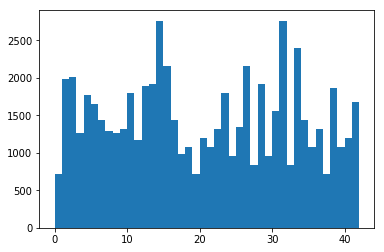

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAP8AAAD8CAYAAAC4nHJkAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAE31JREFUeJztnVuvXddZhsecc5322Ye9fawdN45T56iEHHoIJUWBUJUS
FVGkghBCReKCG/4D14h/gHqDKFwgCgSV9EChSZykTZykSewkThzbyfa2vc97eZ3ngQuQENJ4P5Y3
ZTX0e57L8WrMOfda811DGu/+vpFUVRUAwB/pz/oBAOBnA+YHcArmB3AK5gdwCuYHcArmB3AK5gdw
CuYHcArmB3BKbZI3+43H75X/TtjpDOW87qCIjo8K/d+JgzLXD5JoqZmWUivF7eppXc6ZnpuW2v6j
x6R28sGvSe3LX/2K1B44tSc6Pmv8zH9cVoCq2JDa+W/9udT+/ptPS227NRUdP5CP5JypMv6+hRBC
O9HalYF+h1d7+qXb3mjH5+T6m5maaUntuefeNd7w/+Lj8r0DwITB/ABOwfwATsH8AE7B/ABOwfwA
Tplo1LexMZBaWehorpfFxwvjt6s31DFgvdWQWq2mr7lvJj5vj3G9kOjn2Ny5IbVzVz+Q2t73r+rb
TcU/rIc+MSvnTKdjJUMTQD9HloiXIIRQ01LYGYmYOO/IOfOp/s5Gdf05rm/HI7sQQtju6wh5VIv/
3dM1Hee15hakNi6s/ABOwfwATsH8AE7B/ABOwfwATsH8AE6ZaNTXaBi3q/TvUFnEq6XaPR0djnJd
aTdXX5Ras+xLrTeM32/vrI6olqZ0DHhg1JPa9uVXpXbpu0YEtHJ3dPyB3/2SnBOm9Ge1e3S0paiM
qK+YnpHa7ILO+ma34pFeutCUcw529Xu1vKW/s+FIR4TTTV3dOdeM/9032vo50lxXF44LKz+AUzA/
gFMwP4BTMD+AUzA/gFMmutu/MK13Q9dz/SiF2GCtKt0zLRj9z7odreVGYU9Wxu9XlXr3vTR2vfNM
77KPutekdu3lf5BadzVeLLT2xJNyztyJ/4vdflU4o98Bq7xo3limjs7rhKYbutHxIpmTc/pD/V7N
GEU/9x+K908MIYSq1KnPxvL16PjFrk4WMuM5xoWVH8ApmB/AKZgfwCmYH8ApmB/AKZgfwCkTjfpG
xglanY4uztgzvxQdTwrdy67f3ZHaoPOh1IqGjr32iv54WU8f/TQ04sj1vo6oyko/R9bXBR9rok/i
R8v6Xp88ET/S6n/GKt5ZF+NGRJXul1Lz0GGpnf6V+6S2JHr4DQc6ljuwR99rYUF/VrU5XTBWLV+S
2plv/HN0fPmiPr6sMo7rGhdWfgCnYH4Ap2B+AKdgfgCnYH4Ap2B+AKdMNOrbvGnEPEPdkyzvxSuz
6kZV3MlZfZzR8Xndv622cEhq9b3xPmwHDuq/K6vpyqxjQcdv+5b0sVCHF3VF2vwdn4uOL+7XR0mF
SveXC6X+XqrSiPoq8YxmMZr+PBbvPC21PYd0PeChrdXouGgLGUKwjwZriKO1QghhlOrId/quX5Ta
sf3no+O1S/pIsf7QOKNsTFj5AZyC+QGcgvkBnIL5AZyC+QGcgvkBnDLZ47pa8eq8EEIIpY5JBiJu
mprTVWBP/dKvSu13vvyI1JpLB6QW9scrwdJ5nV9VeTxqCiGEIo832wwhhDSNx5shhJClOqcqy3jV
WVrE46QQQsi33pZakuvnKLr6OaqhiAFL47OSSghJomPAMNiWUqMTj8vKrr5erdIRZlY3LLO0V0pr
y+9I7bXL70XHlzs6Js4TI6scE1Z+AKdgfgCnYH4Ap2B+AKdgfgCnYH4Ap0w26st0mNOpdNTXq+K/
UQufOC7nPPHHvya1vYeN8/hqRnwVlqPjZV83C01GN6VWFrpqK0113FRWRuPPnogWC/03VwP9GqQN
47Myvs9KNDutyhk9p9JRWVo/JrVkVlfaVQvxmDgZ6gg2rF6QUjkyKv7C3VI7++xfSe21nc3oeNo0
zq8cWicbjgcrP4BTMD+AUzA/gFMwP4BTMD+AUya6239z65rUtnO9c5xk8R3ijvHTlRsnUA0335Ba
I9W789lCfDc6TXVPwKqhj4VKgi50Suv6mllDf22l6KtXlfrDSjK9g51kelc5tTacM/GMie4/WJXG
Z5XpnowhWP3s4u9VufO6nJGvnZNaMafTitFQ95S8fu4jqV2rN6LjaU174kDN6Ls4Jqz8AE7B/ABO
wfwATsH8AE7B/ABOwfwATplo1Ldl/dQYxyBlg3j8VtxYkXPef1df79T9B6VWbOsinXQhPi9d0EdJ
hWRRa0FHQyEYOZohGYGeca/dYnbdu+WrWbGifT3jOao8Olx0dN+/XNeYhdph/e48/4N/lNpyd0Nq
+6fj8WE50kVmScpxXQCwSzA/gFMwP4BTMD+AUzA/gFMwP4BTJhr15QN99NMgael5ItUorl2Sc/7u
O9+T2h2nPy+12wpdLZVuxSOltDUv54Smrs7jt/enhRX1xfvj5Ts6Ji6ndG/INLlTasNrT0utVtM9
GdudQXS8yvWchQWtjQtvH4BTMD+AUzA/gFMwP4BTMD+AUzA/gFMme1yXEV2kM/ulduj2E9Hx+UrH
NW/9+J+k9v3nH5DaHz5+r9Ty9Zei49m8EQ82HpVaSOKNG+EWMY56qzpvRcez/LKcky4ekdpbrz4j
tTMvn5fahRu6WnRd+KJe111oN9Z7UhsXVn4Ap2B+AKdgfgCnYH4Ap2B+AKdgfgCnTDbqa+poq278
DKWDeORx+Mgj+l71C1Lbuvi21HqPP6av2Yg/x2hzTc5pTsUrtkIIIbR22cDTJUblXqmjvuF6vKqv
Kg7IOd1cnxn47ee/KbVnLt+QWh7vIxpCCGGmiv9t67mugp1SZyHeAqz8AE7B/ABOwfwATsH8AE7B
/ABOwfwATplo1Fdv6Oq3dj8eyYQQwurym9HxXkc3zjxwcEFfb+W61H7woj7D7alPi4q/zbNyTtWJ
P3sIISTNX5BaSKzGnx4xDtDLdaxb5PHvszavo761Nz6Q2tuv6O+zGhZSO3lQV62W2/Ec8L2+rtzr
FjTwBIBdgvkBnIL5AZyC+QGcgvkBnDLR3f7Zab3DujCvdzb7IgkohrpoZvuq3rXfvrEhtY1OW2qf
fvT3ouNH5/TH2N95T2pTC/dJLdTY7f9vGH368vYlqZViUzxPbso5b507I7Xpui76uX9JF2qdnBVn
zoUQNnfi7/GHpfbEVt6X2riw8gM4BfMDOAXzAzgF8wM4BfMDOAXzAzhlolHf8RNLUmu2dJFO63q8
R96lnVU5J23oWLHfviK1Kxd+KLW/OBMv7PmTx+6Rc6Z7ul9gtXNRasmeU1ILqT7G6f83Rr/D0TU9
qzuU2tT+09HxlXOvyzk/fOU1qV1c05Fjkehim7We0ZNxFI8B5+Zm5JSZYPV/HA9WfgCnYH4Ap2B+
AKdgfgCnYH4Ap2B+AKdMNOq7uabjleT4k1I7cdtno+P99jk5p1voqKzd09VS25uXpfYvf/lsdPy3
T31GzrnnkK7OG3Z177/m/EGp/dxGfYWuqBytvyq1qqcr9IrZ+BFxq2f10Vrtrb1SK41qQOtIrk5o
Sa3RiMeArURHmGmiqwTHhZUfwCmYH8ApmB/AKZgfwCmYH8ApmB/AKRON+oZdfbu167r6La9fio7v
jHQTw9X2stTSTGcye5u6WipdeT46/vL7uqrvxIl4TBlCCJkRKzYGW1JLMt1E8uN/zJc+0qoqdbSV
97pSm57T0dy1Sy9Ex8/86Gk5p9/X1XlzUzpmrYKO38pKSnIJzhIdDwbremPCyg/gFMwP4BTMD+AU
zA/gFMwP4BTMD+CUiUZ9VUPHUO31j6S2LnKSQjQ+DCGE1pRu4Hny5INSu7n6rtQ+Woufu/fX3/qJ
nPPog78ltU/

In [13]:
y_train = y_train.astype(int)
plt.hist(y_train, bins=max(y_train))
plt.show()

#load 5 random images
for i in range(0,6):
    idx = random.randint(0, n_train)
    fig, ax = plt.subplots()
    ax.axis('off')
    ax.imshow(X_train[idx])
align_figures()

### Model Architecture

In [72]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

BATCH_SIZE = 140

from tensorflow.contrib.layers import flatten

def tsclassifier(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    keep_prob = 0.55

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

#     # Dropout
#     fc2    = tf.nn.dropout(fc2, keep_prob)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

print (" --- Lenet defined --- ")

 --- Lenet defined --- 


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [73]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.002

logits = tsclassifier(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


In [74]:

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


<IPython.core.display.Javascript object>


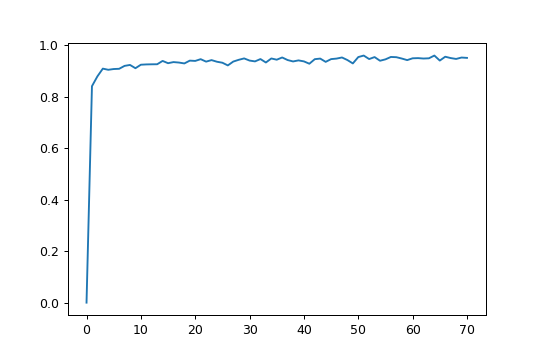

Training...

EPOCH 1 ...
Validation Accuracy = 0.841

EPOCH 2 ...
Validation Accuracy = 0.879

EPOCH 3 ...
Validation Accuracy = 0.910

EPOCH 4 ...
Validation Accuracy = 0.905

EPOCH 5 ...
Validation Accuracy = 0.908

EPOCH 6 ...
Validation Accuracy = 0.909

EPOCH 7 ...
Validation Accuracy = 0.920

EPOCH 8 ...
Validation Accuracy = 0.924

EPOCH 9 ...
Validation Accuracy = 0.911

EPOCH 10 ...
Validation Accuracy = 0.925

EPOCH 11 ...
Validation Accuracy = 0.926

EPOCH 12 ...
Validation Accuracy = 0.926

EPOCH 13 ...
Validation Accuracy = 0.927

EPOCH 14 ...
Validation Accuracy = 0.939

EPOCH 15 ...
Validation Accuracy = 0.931

EPOCH 16 ...
Validation Accuracy = 0.935

EPOCH 17 ...
Validation Accuracy = 0.933

EPOCH 18 ...
Validation Accuracy = 0.930

EPOCH 19 ...
Validation Accuracy = 0.941

EPOCH 20 ...
Validation Accuracy = 0.939

EPOCH 21 ...
Validation Accuracy = 0.946

EPOCH 22 ...
Validation Accuracy = 0.937

EPOCH 23 ...
Validation Accuracy = 0.943

EPOCH 24 ...
Validation Accura

In [75]:

from sklearn.utils import shuffle

#initialise the graph and settings
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.canvas.draw()

EPOCHS = 70

accuracy = [0]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]

            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(X_valid_norm, y_valid)
        accuracy.append(validation_accuracy)

        ax.clear()
        ax.plot(accuracy)
        fig.canvas.draw()

        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './tsc')
    print("Model saved")

In [18]:
from tqdm import *

X_test_class = [None]*n_classes
y_test_class = [None]*n_classes
#Split X_test_norm based on classes, to check evaluation based on class
for cls in (range(n_classes)) :
    X_test_class[cls] =  np.ndarray((0, 32,32,1))
    y_test_class[cls] =  np.ndarray(0)
for i in tqdm(range(len(y_test))):
    cls = y_test[i]
    X_test_class[cls] = np.append(X_test_class[cls],[X_test_norm[i]], axis=0)
    y_test_class[cls] = np.append(y_test_class[cls],[cls], axis=0)

100%|██████████| 12630/12630 [00:05<00:00, 2159.38it/s]


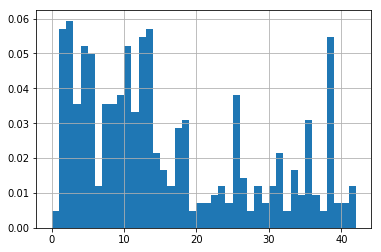

In [19]:
%matplotlib inline

n, bins, patches = plt.hist(y_test, max(y_test), normed=True)
plt.grid(True)
plt.show()

# for cls in (range(n_classes)) :
#     print (len(X_test_class[cls]))
#     print (len(y_test_class[cls]))

In [76]:
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    for cls in range(n_classes):
        X_test_c = X_test_class[cls]
        y_test_c = y_test_class[cls]
        test_accuracy = evaluate(X_test_c, y_test_c)
        print ("Cls %i (Training # : %i Test # : %i)" % (cls,signs_per_class[cls],len(y_test_c)))
        print("Test Accuracy = {:.3f}".format(test_accuracy))

    test_accuracy = evaluate(X_test_norm, y_test)
    print("Global Test Accuracy = {:.3f}".format(test_accuracy))

    valid_accuracy = evaluate(X_valid_norm, y_valid)
    print("Global Validation Accuracy = {:.3f}".format(valid_accuracy))

Cls 0 (Training # : 180 Test # : 60)
Test Accuracy = 0.867
Cls 1 (Training # : 1980 Test # : 720)
Test Accuracy = 0.983
Cls 2 (Training # : 2010 Test # : 750)
Test Accuracy = 0.921
Cls 3 (Training # : 1260 Test # : 450)
Test Accuracy = 0.840
Cls 4 (Training # : 1770 Test # : 660)
Test Accuracy = 0.930
Cls 5 (Training # : 1650 Test # : 630)
Test Accuracy = 0.929
Cls 6 (Training # : 360 Test # : 150)
Test Accuracy = 0.720
Cls 7 (Training # : 1290 Test # : 450)
Test Accuracy = 0.871
Cls 8 (Training # : 1260 Test # : 450)
Test Accuracy = 0.887
Cls 9 (Training # : 1320 Test # : 480)
Test Accuracy = 0.942
Cls 10 (Training # : 1800 Test # : 660)
Test Accuracy = 0.971
Cls 11 (Training # : 1170 Test # : 420)
Test Accuracy = 0.940
Cls 12 (Training # : 1890 Test # : 690)
Test Accuracy = 0.987
Cls 13 (Training # : 1920 Test # : 720)
Test Accuracy = 0.979
Cls 14 (Training # : 690 Test # : 270)
Test Accuracy = 0.993
Cls 15 (Training # : 540 Test # : 210)
Test Accuracy = 0.895
Cls 16 (Training # : 36

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [25]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import cv2
im1 = cv2.imread("from-google/p1.jpg")
im2 = cv2.imread("from-google/p2.jpg")
im3 = cv2.imread("from-google/p3.jpg")
im4 = cv2.imread("from-google/p4.jpg")
im5 = cv2.imread("from-google/p5.jpg")

X_from_google = np.ndarray((0,32,32,3))

X_from_google = np.append(X_from_google,[im1],axis=0)
X_from_google = np.append(X_from_google,[im2],axis=0)
X_from_google = np.append(X_from_google,[im3],axis=0)
X_from_google = np.append(X_from_google,[im4],axis=0)
X_from_google = np.append(X_from_google,[im5],axis=0)

X_from_google = to_gray(X_from_google)
X_from_google = (X_from_google - 128)/128 

y_from_google = np.array([33,4,3,14,10])
#load 5 random images
for i in range(len(X_from_google)):
    print(y_labels[y_from_google[i]])
    fig, ax = plt.subplots()
    ax.axis('off')
    ax.imshow(X_from_google[i].squeeze())
align_figures()


Turn right ahead
Speed limit (70km/h)
Speed limit (60km/h)
Stop
No passing for vehicles over 3.5 metric tons


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAP8AAAD8CAYAAAC4nHJkAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEY1JREFUeJzt3WusZXdZx/H/2mvf9z73y1zOdKYzg+3Qaq0tFpq0+MIA
wgtFiDoUpU00KNTQRKIRCAkaNDVpTAAvUUFTlRI0YARLYkw0+gKxKX1BbMeZoZyZdm7nzJzr3ufs
+1q+8A0h/9/j5HSyYeb5fl6up+uctdfZv1nJevr8/0me5wGAP4Xv9wUA+P4g/IBThB9wivADThF+
wCnCDzhF+AGnCD/gFOEHnCqO85cd/fzv35L/O2FazGRt2NO32PqfK4uVkf6Z22VZK890o8f7uyV9
Tn0ga4OOPq85vStrrbVG9HiS6g9t/ryNuqyFXipLSX0YP57ckl/FEEIIy+/9aHI9/x1PfsApwg84
RfgBpwg/4BThB5wi/IBTY2313aqGfd1qKlZ1Gy3L9L+91Vpf1uLNvP+jWnpWi81qA6ZGy7G9VZO1
kmgfWq3P9vkpWSvv123AmX1bsrZybjZ6PJnQfxcvePIDThF+wCnCDzhF+AGnCD/gFOEHnBprqy+5
Rf+pqdZ7srZrtMOsNtpwqNuHw47xZxMdveaMbpX1+/rnZZkeEBv1dYswlOOfzZrc61b0tOKgq69x
PYtPEIYQwsTBVvT47k5VnuPFLRpHAP8fwg84RfgBpwg/4BThB5wa69v+QkGvdXcz63b0W2rrLbv1
Rr+7od9G779tXdaqxfiadeeWF+U5xaYecimWdEeiONORtYHoILQ39Vp8Vicg6KZJaF2Z0NexE+9I
lBoM9vDkB5wi/IBThB9wivADThF+wCnCDzg11lZfqRxvQ93sjPGWMBjodl6e66GZxrxue62s6rXu
8mH83/OC2LYqhBAWZ7dlbXV9UtZGA/3sKFXjv6/Y0K3DnbZubyYFvQZhY3FH1iZq8RUPt3cZ7OHJ
DzhF+AGnCD/gFOEHnCL8gFOEH3BqrK2+clG3eW5mQ2PbrblmW9Za3cqeft/igm7N3T4Vn/g7ufic
POevLz8oa29aOCdr9zXPy9r53nz0+NfXj8lzLrf0dN5OR9+rXHcBw9pWfH2/hrEdmhc8+QGnCD/g
FOEHnCL8gFOEH3CK8ANOsYDnDZAZC3F2Bnrmr17R7Sa1EGcIITx9xzOy9uavfjh6fOvP9AKeyUj3
yl4qxlt2IYRwqnNU1voH45OHK0/Ep+xCCOHjdz8ra3+38uOytrqrW4Sp+M5t77HNeivhyQ84RfgB
pwg/4BThB5wi/IBThB9wKsmtkagb7P6vfWx8v2yMhiP9b2iS6I/8mR/+gqz95kc+KGuT327pi1Hd
1FQvFjqc0HsNWpJMf7biVi/+u6Z0iy1t69bn8rv0QqIfefeXZO2TL7wjenxm0tgX8Cb3zXf8nv5j
fxee/IBThB9wivADThF+wCnCDzg11sGe2Zp+w9ob6UtRQxgn5lblOd9aOaivo6Gvo1YcyNpquxk9
bg0s/dIxvXbe7z7ymKxVJ/Vgz3BCvzFXb9n70/qc8pZ+yz6q679L6YruOuSl+HnlV+JrDIYQQjZZ
l7WjX9brFv7VN94pa5986u+jx//gf94mz1ma2pK18xszstasxu99CCE0y/oeb3Zq0eOTVT0E1R2+
9ujy5AecIvyAU4QfcIrwA04RfsApwg84NdZWn9XOK6V6K69J0ULZ7MdbJCGEUDbWwJuudmRtraPb
TYNRfK2+f/mxz8pzHj35uP5503qgpryu2zzGrJAc4Cm1dQszZLpVWbq6I2tnfmVB1l585NPR43++
+Tp5zrPve0jW8lQ/p6or+u/55B+9J3r8rpOn5DmvtHQ778jMhqyVC/o7t96NbxsWQghLE/HW4la/
Ks9pll77dmM8+QGnCD/gFOEHnCL8gFOEH3CK8ANOjbXVVzfaE1s93dZYqMXbTcNc/9s1U9ftn2Gm
z0uNPtpv3fXP0eO/8KHfkOfUhvo6Kmu6nWdO0xntt87h+DZZ1Ut6Am8wp9ubRWOHtTv+Qk9V3rvz
RPT4qff/iTxn4Rk9uff0z+kpvKyqt0RbevZS9Pg3Ttwhz5k5rNt5jZLems36Xu0a27ZNVuLfg75o
LYcQQiXVbcXrxZMfcIrwA04RfsApwg84RfgBpwg/4NRYW33TZd32slp9xYKY+DPaUA2jrWi1UA5P
6DbPy7190eOVNT0xl4z0ReZG28jaumo0qe9VbTl+/VldL+CZGVt5WdtkDSYnZC2Iv9mP/Ncj8pTP
3fu0rP3OP/6NrH3ssffLWl6NT04e/ZJulU19Qn8H+pmOjJr6DCGEY9Nr+meK8+aMBW8nS7pNfL14
8gNOEX7AKcIPOEX4AacIP+AU4QecGmurr2ss4LnU1PujFZN4u6w9MPasM/bPO1DX02OzJT0x97VP
vTl6fH5Dt4aSvm4DDhd0qyxPdPutMDR6nKN4i23+jy/KU5489E+ytpvr6xgZNeW2on7ePNM6Jmt3
Vy7I2qUP6bbokY/G71XlxVflOaevLsra0Tm916C1CG0j1dc4zOKt22LQP+9G4MkPOEX4AacIP+AU
4QecIvyAU4QfcGqsrb7MWHCzXNAtsX4Wn3paquv2YGuo24Ato0V4VzO+4GMIISz+W7yWTeg9A3u3
TctasaXbP8VV/dlGC/FFOkMIofqX7ejxD+z/V3nO8739svbUb79X1rKSbvU1LsSnznof15/ri6/X
k3tvef5XZW3pD/XimElbtGFrejKy8VU9ybhxUk+m7qvrRVIv7OjvwVw13l5uG9/h9uC1P7d58gNO
EX7AKcIPOEX4AacIP+DUWN/2N0s9WbOGfpTpkl7jzNrO6PSWHtw4Ur4ma4ODM9Hj6Y7x1t56o39Z
DwSNFvUb/WFTv92+bzo+sPJC56g859lHH5a1urFWXGlFv7lf/XR87bzP3fkFec5PPvdrsnb743pr
sDCn36TnU8348YJ+7k2e099T/a4/hKmyvlfWoNmEuMfWmpe9PeTle/HkB5wi/IBThB9wivADThF+
wCnCDzg11lZfLdXDO42ibq+0BvEhjFc78dZbCCEsVuIDLiGEsK+mBzDSkOtaO36NWUXfxuJVvV5g
/8i8rJVW9HkVY+jnocaZ6PFPvPzT8pzGRd3eLEzrdQZPP64Hgn5i/r+jx9/5Hx+U55z4sF5XLzus
27Ppmv575vX4d6ewoe9v94Rus1qrFlprGlrfx3M7s9Hjx5r673Jt2DCu5Prw5AecIvyAU4QfcIrw
A04RfsApwg84NdZW32xZb4X16q5u2ylqG68QQljtxae5QgihXNDbIKXGz0y68Val+S+ose1W6apu
/+QNvcZcKMbXNAwhhM2sHj1+aV2vS/e6Sf01GE3o67jzM3q9wytPxe//64t6Oi87qFuf6cqmrOUT
8c8cQghBbJeWzet2Xu2KbjvrOdIQKsb3amCsX7lQ1d8DpVHU06LXiyc/4BThB5wi/IBThB9wivAD
ThF+wKmxtvo2B3pbq9mysRin2Mqrl+mFLC1FoyVzuntA1pLteEsmr+o2ZV7St3g4qyez0h3dbgrX
dNtruhC/j4WCnlZMerptlC7rCcJsaUHXyvF2pLVoadLXi67mxjVak3aq1ZqdvyhP2fzF+2XtSOOC
rK31dMtxrqK/36pl3Roa7d4bgCc/4BThB5wi/IBThB9wivADThF+wKnx7tWX6vZVIdGtqEEebxsV
jAm8UqLbeda+aat9vWDlpXcdix7f/+/r8pxQ0I2o4lndNkom9XWECd0i7It7ZQwXhjDU9yrM6GnA
wppeBLOQxp8red9o2e0aF2lMMlrU78tH+jNfe6Ou/fzMsqyd2dELmlr7Sk4V43vyXRvoyVQrS9eL
Jz/gFOEHnCL

### Predict the Sign Type for Each Image

In [50]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

def predict_g(X_data):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        results = sess.run(logits, feed_dict={x: X_data})
    return (np.argmax(results,axis=1))

predictions = predict_g(X_from_google)

for i in range(len(predictions)):
    print("Original <<{}>> --- Predicted <<{}>>".format(y_labels[y_from_google[i]],y_labels[predictions[i]]))

Original <<Turn right ahead>> --- Predicted <<Stop>>
Original <<Speed limit (70km/h)>> --- Predicted <<Speed limit (70km/h)>>
Original <<Speed limit (60km/h)>> --- Predicted <<Keep left>>
Original <<Stop>> --- Predicted <<Stop>>
Original <<No passing for vehicles over 3.5 metric tons>> --- Predicted <<No passing>>


### Analyze Performance

In [29]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.


def evaluate_g(X_data, y_data):
    num_examples = len(X_data)
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        sess = tf.get_default_session()
        accuracy = sess.run(accuracy_operation, feed_dict={x: X_data, y: y_data})

    return accuracy

g_accuracy = evaluate_g(X_from_google, y_from_google)
print("Images From Google Accuracy = {:.3f}".format(g_accuracy))

Images From Google Accuracy = 0.400


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [71]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    results = sess.run(logits, feed_dict={x: X_from_google})
    top5 = sess.run(tf.nn.top_k(tf.constant(results), k=5))

probs,indexes = top5

print("Probabilities:\n %a" % probs)
print("Classes:\n %a" % indexes)

for row in range(len(indexes)):
    print("Top 5 predictions for image #%d" % row)
    print(" << %s >> " % y_labels[y_from_google[row]])
    for col in range(len(indexes[row])):
        cls = indexes[row][col]
        print ("\t %s" % y_labels[cls])

Probabilities:
 array([[  13.60344315,   13.36976719,   -3.95121551,   -5.74542809,
          -8.81635094],
       [ 154.18362427,  -43.41639328,  -50.23807526,  -53.5262146 ,
         -88.41347504],
       [  16.57634163,   14.10898876,   11.63158226,    4.98148251,
           4.27640772],
       [  53.98876572,    9.50299454,   -7.72342253,  -11.46054268,
         -18.82323265],
       [  23.30830002,   22.98032188,   18.12973785,    9.72690201,
          -8.34389782]], dtype=float32)
Classes:
 array([[41, 13, 33, 16, 14],
       [ 4,  0,  8, 26,  1],
       [27, 37, 19, 11, 26],
       [14, 34,  9, 15, 33],
       [33, 16,  9, 10, 37]], dtype=int32)
Top 5 predictions for image #0
 << Turn right ahead >> 
	 End of no passing
	 Yield
	 Turn right ahead
	 Vehicles over 3.5 metric tons prohibited
	 Stop
Top 5 predictions for image #1
 << Speed limit (70km/h) >> 
	 Speed limit (70km/h)
	 Speed limit (20km/h)
	 Speed limit (120km/h)
	 Traffic signals
	 Speed limit (30km/h)
Top 5 predictio

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")